# Ford Go Bike Dataset Anaysis

By Yazeed Edan

# Investigation Overview

This ducoment include an investigation of the Ford GoBike Dataset I was intrestd in knowing the diffrences betweet user types ( Customers, Subscribers)

### Dataset Overview
Ford goBike is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District.
In this presentation we will see the diffrences between customers and subscribers in the number of rides in month, week days and hours, also we will see the diffrences in duration time in rides.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [30]:
df = pd.read_csv('df_final.csv')

In [3]:
df.head()

,Unnamed: 0,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,start_time_inmonth,start_time_inweekdays,start_time_inhour,duration_min
0,0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,December,Sun,16,1335.166667
1,1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,December,Sun,15,1313.333333
2,2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,December,Sun,22,762.800000
3,3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,December,Sun,17,1036.200000
4,4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,December,Sun,14,726.716667


In [32]:
# list of months in order
month_order = ['June', 'July', 'August', 'September', 'October', 'November', 'December']
# create ordered categorical variable
df['start_time_inmonth'] = pd.Categorical(df['start_time_inmonth'],
                                         categories = month_order,
                                         ordered = True)

In [33]:
# list of months in order
order_days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']
# create ordered categorical variable
df['start_time_inweekdays'] = pd.Categorical(df['start_time_inweekdays'],
                                         categories = order_days,
                                         ordered = True)

# Rides in month

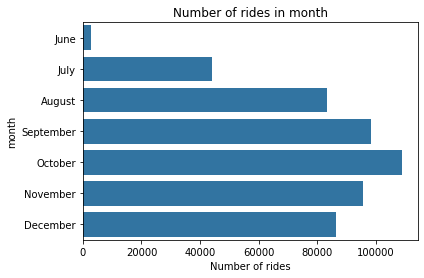

In [34]:
# Let's see the number of rides per month
base_color = sb.color_palette()[0]


# create bar chart for the number of rides per month
gr = sb.countplot(data = df, y = 'start_time_inmonth', color = base_color)
gr.set_title('Number of rides in months');
plt.xlabel('Number of rides')
plt.ylabel('month')
gr.set_title('Number of rides in month');

As we can see from the graph, bikes rides less often in weekends, probably because most of the users use it for work

# Rides in weekdays

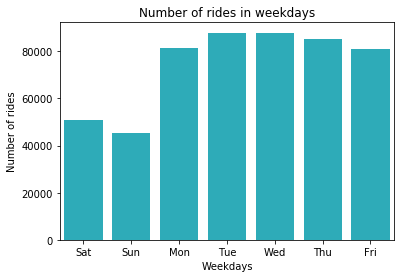

In [35]:
# Let's see the number of rides per weekdays

base_color = sb.color_palette()[9]
# create bar chart for the number of rides per weekdays
gr = sb.countplot(data = df, x = 'start_time_inweekdays', color = base_color)
plt.ylabel('Number of rides')
plt.xlabel('Weekdays')
gr.set_title('Number of rides in weekdays');

As we can see from the graph, bikes rides less often in weekends, probably because most of the users use it for work

# Rides for hour

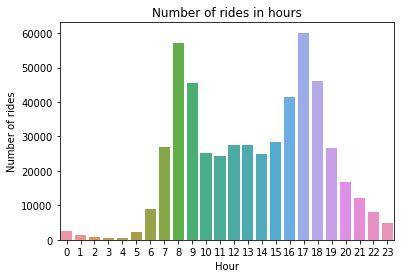

In [8]:
# the number of rides per hour
# create bar chart for the number of rides per hours
gr = sb.countplot(data = df, x = 'start_time_inhour',)
gr.set_title('Number of rides in hours');
plt.ylabel('Number of rides')
plt.xlabel('Hour');

Rides more often in 8AM and 5PM, probably because the work and school time

# Disturbation of duration time in minutes

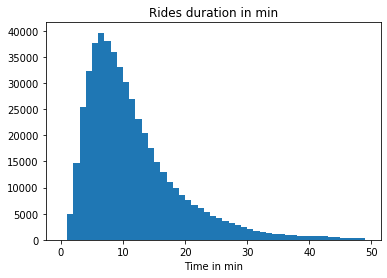

In [10]:
#The Disturbation of the duration
bins_size=np.arange(0, 50 ,1)
plt.hist(data =df, x = 'duration_min', bins=bins_size)
plt.xlabel('Time in min');
plt.title('Rides duration in min');

the duration time mostly between 6-12 minutes

# Customer vs Subscribe

The number of subscribers is almost three times more than Customers

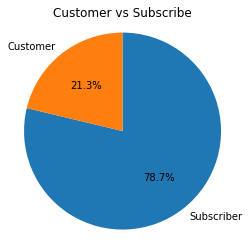

In [11]:
# see hou much the precntage of subscribers vs customers
sorted_counts = df['user_type'].value_counts()
# create pie chart for the precntage of customers and subscribers
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,autopct='%.1f%%')
plt.axis('square')
plt.title('Customer vs Subscribe');

### Observations
as we can see from the graph, there's 78.7% Subscriber and 21.3% Customer

# Discussion
the highest number of rides was in october and septmber in months, in week days it was the week ends less number of rides than the other days, in hours the peak was in 8AM and 5PM, and the average duration time was between 6-12minutes.

as we saw the prentage of the subscribers was 78.7% and the customers was 21.3%.

in the next section I will see the diffrences between customers and subscribers in number of rides.

# The number of rides for Customer and Subscribers in month

September has the highest frequent rides for customer and October for Subscriber, and June has less frequent rides for both of them.

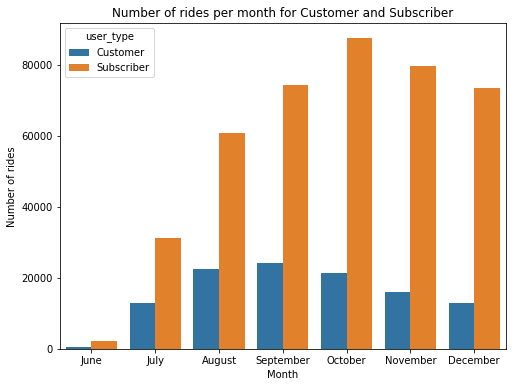

In [36]:
# let's see the number of rides for bot users
plt.figure(figsize = [8, 6])
# create bar chart for the number of rides in month for both user
gr = sb.countplot(data = df, x = 'start_time_inmonth', hue = 'user_type')
plt.ylabel('Number of rides')
plt.xlabel('Month');
gr.set_title('Number of rides per month for Customer and Subscriber');

# The number of rides for Customer and Subscribe in week days

Subscribers has less bikes rides in Sun and Sat and for customers has more bikes rides in Sun and Sat, maybe because subscribers use bikes for work more than anything else and customers use it more during the weekends just for fun

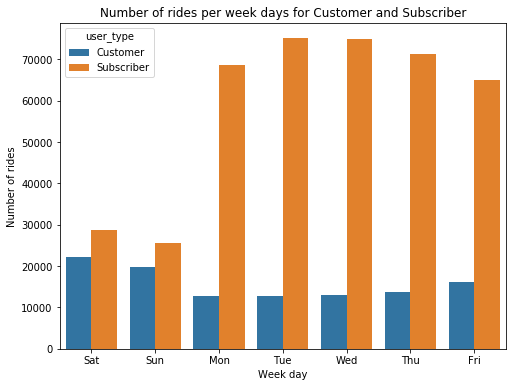

In [37]:
# let's see the number of rides per day
plt.figure(figsize = [8, 6])
# create bar chart for the number of rides in weekdays for both user
gr = sb.countplot(data = df, x = 'start_time_inweekdays', hue = 'user_type', order=order_days);
plt.ylabel('Number of rides')
plt.xlabel('Week day');
gr.set_title('Number of rides per week days for Customer and Subscriber');

# The number of rides for Customer and Subscribe in hours

Subscribers in 8AM and 5PM take more rides, maybe because it the work time, and customers take rides more in 12PM to 5PM, maybe because the most of the customers are tourist or people that are just enjoying of thier time.

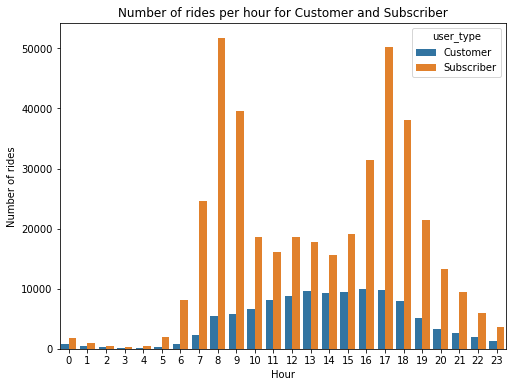

In [14]:
# the number of rides per hour
plt.figure(figsize = [8, 6])
# create bar chart for the number of rides in hours for both user
gr = sb.countplot(data = df, x = 'start_time_inhour', hue = 'user_type');
plt.ylabel('Number of rides')
plt.xlabel('Hour');
gr.set_title('Number of rides per hour for Customer and Subscriber');

# Discussion
For the subscribers october it was the highes number of rides and september fir the customers, and subscribers has the lowest number of rides in the weekends but in the other hand customers has the highest number of rides in the weekends, this probably most of the customers are just people enjoyng in their time in the weekends and the subscribers use the rides for work or school the and there's a strong evdince ffor that, the rush hours for the subscribers in 8AM and 5PM which is swork time, and for the customers the rush hours from 1PM to 6pm where the weather is good and it's a good time for bikes rides.

in the next section we will try to know the highest duration time for customers and subscribers in months, week days and hours.

# The average duration time for Customer and Subscribe per month

the higher values of average duration time in July and June for customers and in September and July for subscribers, but in genral line plot is more stable for the subscribers.

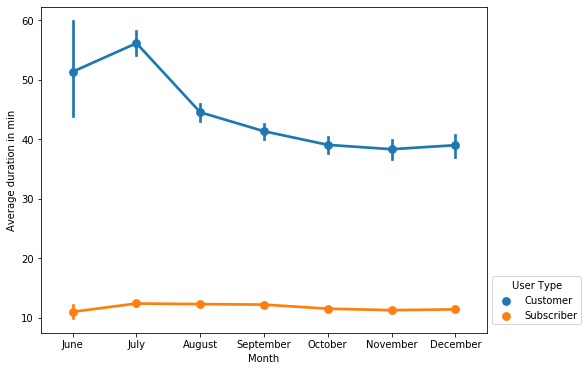

In [40]:
# the average duration time per users in months
plt.figure(figsize = [8, 6])
# create box plot for the average duration time for both users in months
gr = sb.pointplot(data = df, x='start_time_inmonth', y='duration_min', hue='user_type',height=5)
plt.ylabel('Average duration in min')
plt.xlabel('Month')
plt.legend(loc='center left',title="User Type", title_fontsize = 10,bbox_to_anchor=(1,0.10) );

# The average duration time for Customer and Subscribe  per week days

the higher values of average duration time in weekends for the customers and for the subscribers it's almost the same, this probably because most of the customers are just people having fun.

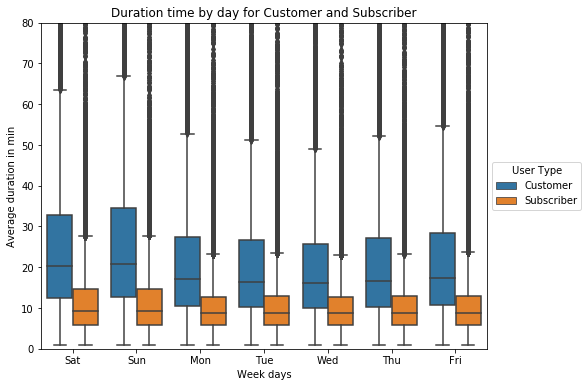

In [41]:
# the average duration time per users in week days
plt.figure(figsize = [8, 6])
# create box plot for the average duration time for both users in week days.
gr = sb.boxplot(data = df, x= 'start_time_inweekdays', y='duration_min', hue = 'user_type', dodge = True)
plt.ylim(0,80)
gr.set_title('Duration time by day for Customer and Subscriber')
plt.ylabel('Average duration in min')
plt.xlabel('Week days')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5),title="User Type", title_fontsize = 10);


# The average duration time for Customers vs Subscribers per hours

The higher values of average duration time in 1AM to 4AM for both users which is odd because it’s too late and there's a drop between 5AM to 9AM for the customers, for the subscribers the line plot it seems stable more than the customers.

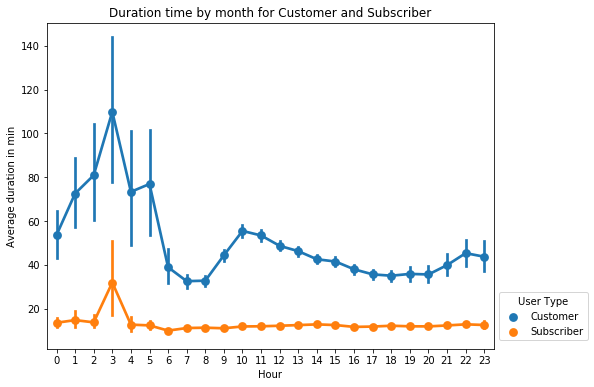

In [42]:
# the average duration time per users in hours
plt.figure(figsize = [8, 6])
#  Create point plot for the average duration for both users in hours
gr = sb.pointplot(data = df, x='start_time_inhour', y='duration_min', hue='user_type',height=5)
gr.set_title('Duration time by month for Customer and Subscriber')
plt.ylabel('Average duration in min')
plt.xlabel('Hour')
plt.legend(loc='center left',title="User Type", title_fontsize = 10,bbox_to_anchor=(1,0.10) );

# Conclustion
The highest average duration time for customers in july and june, and september and july for subscribers, in week days both of them the highest duration time in the weekends, this probably because they rides in the weekends just for fun and enjoying in their time but in general subscribers less than customers in the average duration time in all the time and this also a strong evdince that customers rides for fun and subscribers use it for the work or school

In [44]:
!jupyter nbconvert slide_deck_templatee.ipynb --to slides --post serve --template output-toggle.tpl

[NbConvertApp] Converting notebook slide_deck_templatee.ipynb to slides
[NbConvertApp] Writing 458520 bytes to slide_deck_templatee.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/yazeedaledan/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/yazeedaledan/opt/anaconda3/lib/python3.7/site-packages/jupyter_core/application.py", line 268, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/yazeedaledan/opt/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/Users/yazeedaledan/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "/Users/yazeedaledan/opt/anaconda3/lib/python3.7/site-packages/nbconvert/nbconvertapp.py", line 510, in con